**Title：**Comprehensive Analysis of Visa Inc. Stock Data (2008-2024)

**Analysis Outline：**
This analysis will explore Visa's stock performance from 2008 to October 2024. We'll gain insights into its trends, key metrics, and overall market behavior through statistical, graphical, and time-series analyses.

#**1. Data Loading and Exploration**

In [33]:
# Step 1.1: Import Libraries
# Importing essential libraries for data loading, manipulation, and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Set visual style for plots to enhance readability
sns.set(style="whitegrid")

In [34]:
# Step 1.2: Load Data
# Load the dataset into a pandas DataFrame
file_path = r"E:\数据分析项目\Visa Stock Data 2024\visa_stocks.csv"
visa_data = pd.read_csv(file_path)

In [35]:
# Step 1.3: Inspect Data
# Display the first few rows to understand the data structure
print("First 5 rows of the dataset:")
print(visa_data.head())

First 5 rows of the dataset:
         Date       Open       High      Low    Close  Adj Close     Volume
0  2008-03-19  14.875000  17.250000  13.7500  14.1250  12.579995  708486000
1  2008-03-20  14.600000  16.250000  14.3750  16.0875  14.327834  198985200
2  2008-03-24  16.809999  16.924999  14.7500  14.9325  13.299167  149566400
3  2008-03-25  15.145000  16.062500  14.9550  15.8125  14.082910   87092000
4  2008-03-26  15.682500  16.120001  15.3925  15.9900  14.240999   43111600


In [36]:
# Check the data types and look for missing values with info()
print("\nData Info:")
visa_data.info()


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4177 non-null   object 
 1   Open       4177 non-null   float64
 2   High       4177 non-null   float64
 3   Low        4177 non-null   float64
 4   Close      4177 non-null   float64
 5   Adj Close  4177 non-null   float64
 6   Volume     4177 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 228.6+ KB


In [37]:
# Display basic statistics of the dataset to understand the range and distribution of numerical columns
print("\nSummary Statistics:")
print(visa_data.describe())


Summary Statistics:
              Open         High          Low        Close    Adj Close  \
count  4177.000000  4177.000000  4177.000000  4177.000000  4177.000000   
mean    109.997006   110.988504   108.997184   110.016274   106.440847   
std      84.678218    85.385175    83.960169    84.686806    84.244500   
min      10.672500    11.047500    10.445000    10.605000     9.477159   
25%      29.635000    29.934999    29.347500    29.737499    27.196886   
50%      78.980003    79.650002    78.379997    79.040001    74.487785   
75%     196.250000   198.830002   193.809998   196.160004   190.993469   
max     291.839996   293.070007   290.079987   291.559998   291.559998   

             Volume  
count  4.177000e+03  
mean   1.459021e+07  
std    1.967747e+07  
min    1.640900e+06  
25%    6.622700e+06  
50%    9.420400e+06  
75%    1.538160e+07  
max    7.084860e+08  


In [38]:
# Optionally, we can also check for any duplicate rows in the dataset
print("\nNumber of duplicate rows:", visa_data.duplicated().sum())


Number of duplicate rows: 0


#**2. Data Preprocessing and Cleaning**

In [39]:
#2.1 Check for Missing Values:
print("Missing values in each column:")
print(visa_data.isnull().sum())


Missing values in each column:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [40]:
#2.2 Data Type Conversion:
#Convert the Date column to a datetime format, which will allow for easy time-based indexing and resampling in future analysis steps.

visa_data['Date'] = pd.to_datetime(visa_data['Date'])


In [41]:
#2.3 Handle Outliers:
#Detect potential outliers, especially in columns like Volume, High, Low, and Close. For instance, you can use Z-scores or Interquartile Range (IQR) to identify unusually high or low values.

# Define a function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# List of columns to check for outliers
columns_to_check = ['Volume', 'High', 'Low', 'Close']

# Loop through each column and detect outliers
for column in columns_to_check:
    outliers, lower_bound, upper_bound = detect_outliers_iqr(visa_data, column)
    print(f"\nOutliers in '{column}':")
    print(outliers)
    print(f"Lower bound for '{column}': {lower_bound}")
    print(f"Upper bound for '{column}': {upper_bound}")
    print(f"Number of outliers in '{column}': {outliers.shape[0]}")



Outliers in 'Volume':
           Date        Open        High         Low       Close   Adj Close  \
0    2008-03-19   14.875000   17.250000   13.750000   14.125000   12.579995   
1    2008-03-20   14.600000   16.250000   14.375000   16.087500   14.327834   
2    2008-03-24   16.809999   16.924999   14.750000   14.932500   13.299167   
3    2008-03-25   15.145000   16.062500   14.955000   15.812500   14.082910   
4    2008-03-26   15.682500   16.120001   15.392500   15.990000   14.240999   
...         ...         ...         ...         ...         ...         ...   
1980 2016-01-29   70.430000   74.500000   68.760002   74.489998   70.075684   
1986 2016-02-08   69.949997   70.040001   66.300003   67.769997   63.753925   
3023 2020-03-23  141.330002  143.350006  133.929993  135.740005  131.468475   
3273 2021-03-19  219.119995  220.169998  206.880005  206.899994  201.643631   
3442 2021-11-17  205.949997  207.309998  199.460007  205.059998  200.766327   

         Volume  
0     7084

Since the outliers are only present in the **Volume column**, here’s a rationale for choosing the best approach:

**Context of Volume Outliers:**
#High trading volumes often indicate market events, significant news, or investor activity, which can be informative rather than erroneous. Removing #these outliers could mean losing important information.
However, these high volumes can skew summary statistics, making it harder to analyze general trends.

**Recommended Approach: Capping Outliers:**
#Capping is a balanced approach. It reduces the influence of extreme values without removing potentially valuable records.
#By capping, we limit the maximum volume to a reasonable upper bound based on the IQR calculation, which will help in keeping our analysis more consistent without fully discarding any data.

In [42]:
# Step 1: Cap the outliers in the 'Volume' column at the upper bound
upper_bound_volume = 28519950.0  # The calculated upper bound for Volume from previous analysis

# Apply capping for Volume
visa_data['Volume'] = visa_data['Volume'].apply(lambda x: min(x, upper_bound_volume))

# Verify the capping effect
print("Volume column after capping outliers:")
print(visa_data['Volume'].describe())


Volume column after capping outliers:
count    4.177000e+03
mean     1.220121e+07
std      7.466339e+06
min      1.640900e+06
25%      6.622700e+06
50%      9.420400e+06
75%      1.538160e+07
max      2.851995e+07
Name: Volume, dtype: float64


**Count:** The count of values remains 4,177, which means no rows were removed. This is expected because capping only limits extreme values without discarding data.

**Mean:** The new mean of the Volume column is around 12.2 million, which is slightly lower than the previous mean. This decrease is expected since extreme high values were capped, reducing their impact on the overall average.

**Standard Deviation (std):** The standard deviation is now 7.47 million, showing a reduction in variability compared to the original data. This indicates that the capping successfully reduced the influence of extreme values on the spread of the data.

**Min:** The minimum volume value is 1.64 million, which is reasonable and remains unchanged (since it was already within the bounds).
**Max:** The maximum volume value is now capped at 28,519,950 (as per our calculated upper bound), meaning no volume exceeds this limit. This confirms that the capping worked correctly, as the maximum aligns with the set upper bound.
**Quartiles (25%, 50%, 75%):** The quartiles (Q1, Q2/median, and Q3) are also consistent with the capped data and provide a more stable representation of the distribution.

**this result is correct and aligns with expectations for capped data**

#**3.Exploratory Data Analysis (EDA)**

In [43]:
#3.1. Re-examine Summary Statistics

print("Updated summary statistics after capping:")
print(visa_data.describe())


Updated summary statistics after capping:
                                Date         Open         High          Low  \
count                           4177  4177.000000  4177.000000  4177.000000   
mean   2016-07-03 10:47:46.554943744   109.997006   110.988504   108.997184   
min              2008-03-19 00:00:00    10.672500    11.047500    10.445000   
25%              2012-05-09 00:00:00    29.635000    29.934999    29.347500   
50%              2016-07-05 00:00:00    78.980003    79.650002    78.379997   
75%              2020-08-26 00:00:00   196.250000   198.830002   193.809998   
max              2024-10-21 00:00:00   291.839996   293.070007   290.079987   
std                              NaN    84.678218    85.385175    83.960169   

             Close    Adj Close        Volume  
count  4177.000000  4177.000000  4.177000e+03  
mean    110.016274   106.440847  1.220121e+07  
min      10.605000     9.477159  1.640900e+06  
25%      29.737499    27.196886  6.622700e+06  
50%   

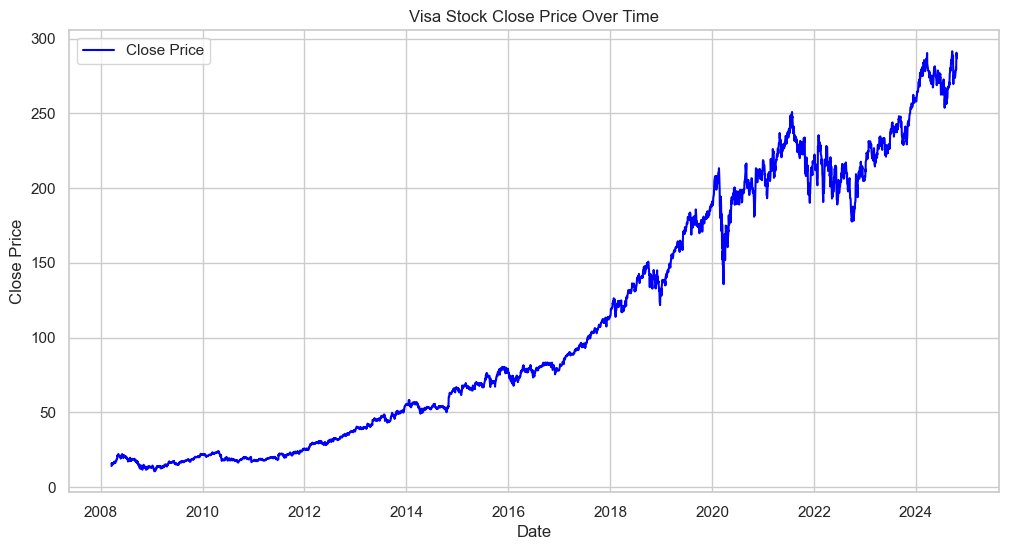

In [44]:
#3.2Time-Series Visualization of Close Prices
#Purpose: To visualize how the Close price has changed over time, revealing long-term trends, fluctuations, and possible seasonal patterns.
plt.figure(figsize=(12, 6))
plt.plot(visa_data['Date'], visa_data['Close'], label='Close Price', color='blue')
plt.title("Visa Stock Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()


Overall Trend: The Close price for Visa has shown a strong upward trend from 2008 to 2024, indicating long-term growth in stock value.

Periods of Volatility: There are noticeable fluctuations, especially around 2020. This period likely reflects market-wide instability due to external events (e.g., the COVID-19 pandemic).

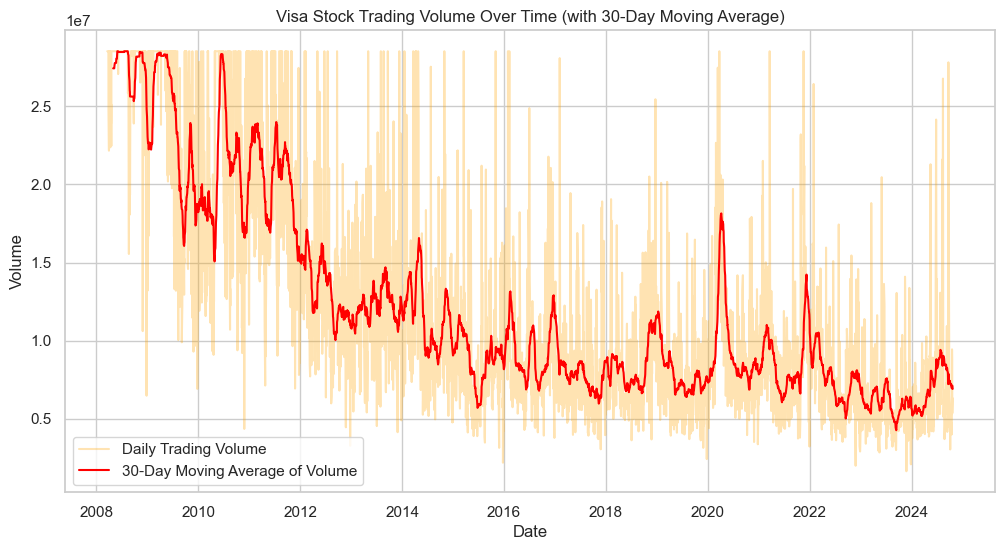

In [45]:
#3.3 Bar Plot for Volume Data
# Adding a 30-day moving average to smooth the volume data
visa_data['Volume_MA_30'] = visa_data['Volume'].rolling(window=30).mean()

plt.figure(figsize=(12, 6))
# Plotting original data with transparency
plt.plot(visa_data['Date'], visa_data['Volume'], label='Daily Trading Volume', color='orange', alpha=0.3)
# Plotting 30-day moving average
plt.plot(visa_data['Date'], visa_data['Volume_MA_30'], label='30-Day Moving Average of Volume', color='red')
plt.title("Visa Stock Trading Volume Over Time (with 30-Day Moving Average)")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.show()


Observations and Interpretation

**Overall Decline in Trading Volume:**
The 30-day moving average (red line) reveals a general decline in trading volume over time, especially noticeable after 2012.
This could indicate reduced trading interest or a more stable investor base over the years, as trading activity becomes less volatile in comparison to the early years.
Periods of High Volume:

**Significant peaks in trading volume are visible around certain periods:**
2008-2010: These high-volume periods align with the global financial crisis, where trading activities likely surged due to economic uncertainty.
2019-2020: Another peak is observed, likely corresponding to the COVID-19 pandemic, where global markets experienced increased volatility, and investors reacted to economic changes.
2023-2024: There is an increase in volume towards the end of the timeline, suggesting a recent surge in trading activity, possibly due to economic shifts, earnings reports, or market events related to Visa.

**Summary**
The 30-day moving average reveals that Visa’s trading volume has generally declined over the years, with distinct spikes around major economic events such as the financial crisis and the COVID-19 pandemic. These high-volume periods suggest that external events significantly impact trading behavior, while periods between them show stability and lower trading activity. This visualization effectively highlights long-term trends in trading volume, providing a more comprehensive understanding of investor behavior over time.

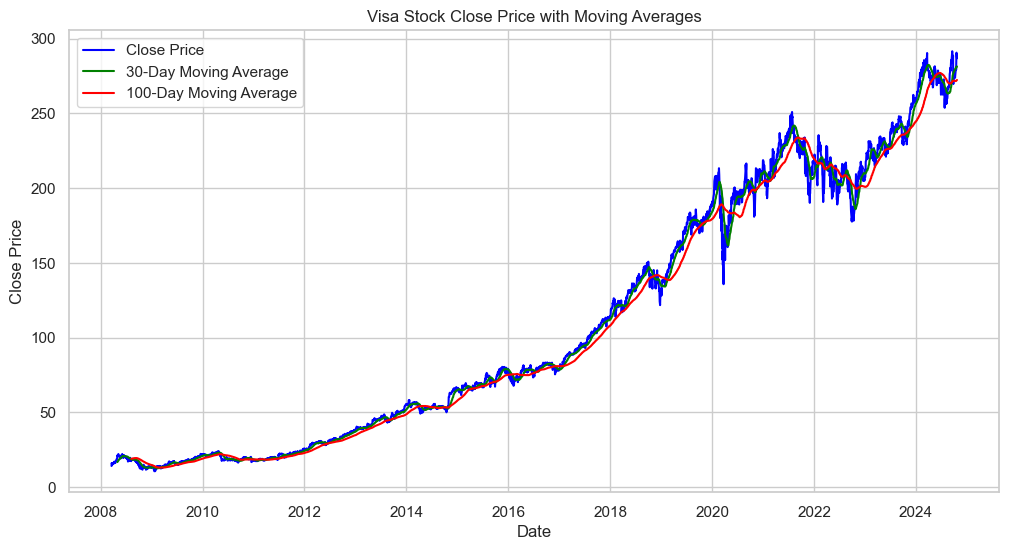

In [46]:
#3.4 Moving Averages for Trend Analysis
#Purpose: Moving averages help smooth out short-term fluctuations and highlight longer-term trends in the stock's Close price.
visa_data['30_day_MA'] = visa_data['Close'].rolling(window=30).mean()
visa_data['100_day_MA'] = visa_data['Close'].rolling(window=100).mean()

plt.figure(figsize=(12, 6))
plt.plot(visa_data['Date'], visa_data['Close'], label='Close Price', color='blue')
plt.plot(visa_data['Date'], visa_data['30_day_MA'], label='30-Day Moving Average', color='green')
plt.plot(visa_data['Date'], visa_data['100_day_MA'], label='100-Day Moving Average', color='red')
plt.title("Visa Stock Close Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()


**1.Overall Upward Trend:**

* The Close price for Visa has shown a strong upward trend from 2008 to 2024, indicating steady growth in stock value over time.

* The rising trend of both the 30-day (green line) and 100-day (red line) moving averages supports this long-term appreciation in Visa’s stock price.

**2.Moving Averages (30-Day vs. 100-Day):**

* 30-Day Moving Average (Green Line): This shorter-term moving average captures more recent price movements and reacts more quickly to changes in the Close price. It highlights minor fluctuations and provides a view of short- to medium-term trends.

* 100-Day Moving Average (Red Line): This longer-term moving average smooths out more of the volatility, showing a steadier trend and highlighting Visa’s general price movement over time.

* The 30-day moving average often stays close to the Close price, while the 100-day average shows a lag, indicating its slower reaction to daily price changes.

**3.Crossovers:**
* When the 30-day moving average crosses above the 100-day moving average, it can indicate the beginning of an upward trend (bullish signal).
#When the 30-day moving average crosses below the 100-day moving average, it may signal a downward trend (bearish signal).
* In this plot, you can see that these crossovers align with upward or downward trends in the Close price, providing insight into potential trading signals.

**4.Periods of Volatility:**
* Around 2020, there’s a visible fluctuation where the Close price deviates from both moving averages. This period likely corresponds to the market volatility induced by the COVID-19 pandemic, causing more drastic short-term fluctuations.
* Similar, smaller fluctuations can be seen in other periods, but they tend to smooth out quickly as the stock price returns to its upward trajectory.

**5.Stability Over Time:**
* The stock generally moves back towards the 100-day moving average during fluctuations, showing its effectiveness as a trend indicator over the long term.

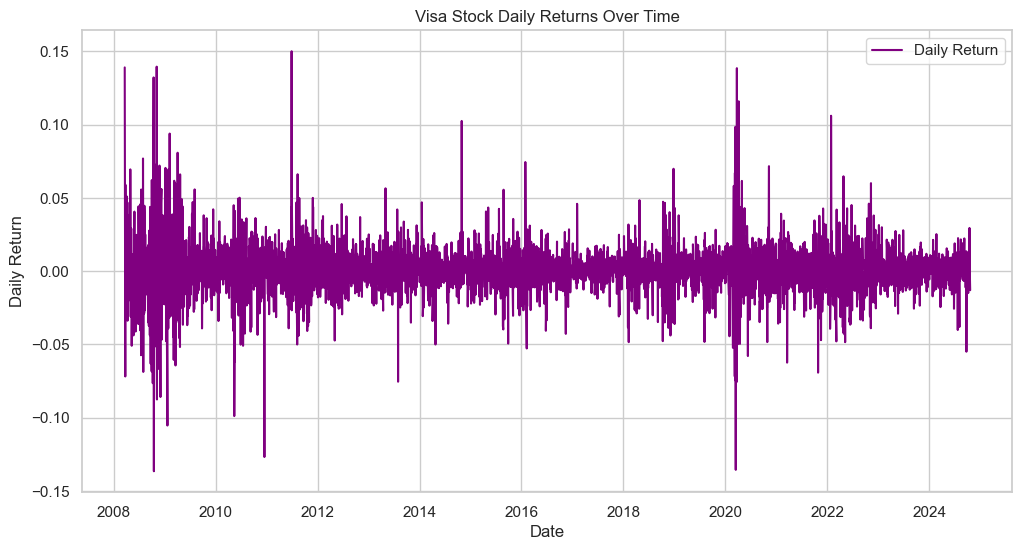

In [47]:
# 3.5. Daily Returns Calculation and Visualization
#Purpose: To analyze daily volatility and understand the percentage change in Close price day by day.
visa_data['Daily_Return'] = visa_data['Close'].pct_change()

plt.figure(figsize=(12, 6))
plt.plot(visa_data['Date'], visa_data['Daily_Return'], label='Daily Return', color='purple')
plt.title("Visa Stock Daily Returns Over Time")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.legend()
plt.show()


1. **Overall Volatility:**
   - The daily returns fluctuate around zero, indicating that the stock's daily performance is balanced between gains and losses on average.
   - The plot shows periods of higher volatility, with returns that swing widely in both positive and negative directions.

2. **High Volatility Periods:**
   - Significant spikes in volatility are noticeable, especially around certain key dates:
     - **2008-2009:** There are large fluctuations in daily returns, likely due to the global financial crisis, which caused extreme movements in stock prices.
     - **2020:** Another period of increased volatility, which aligns with the onset of the COVID-19 pandemic. This period saw rapid changes in stock prices across markets as investor sentiment fluctuated with the global situation.
   - Other smaller spikes in volatility appear periodically, suggesting that external factors or market conditions occasionally impact Visa's stock price more heavily.

3. **Stabilization Over Time:**
   - Although daily fluctuations remain present, there is a visible reduction in extreme spikes in volatility after the 2008 crisis period and between 2011 and 2019.
   - This stabilization may indicate that, during normal market conditions, Visa’s stock experiences fewer extreme daily returns.

4. **Recent Volatility (2023-2024):**
   - In the recent period (2023-2024), there is a slight increase in volatility, though not as pronounced as during 2008 or 2020. This could reflect current market uncertainties or economic shifts affecting investor behavior.


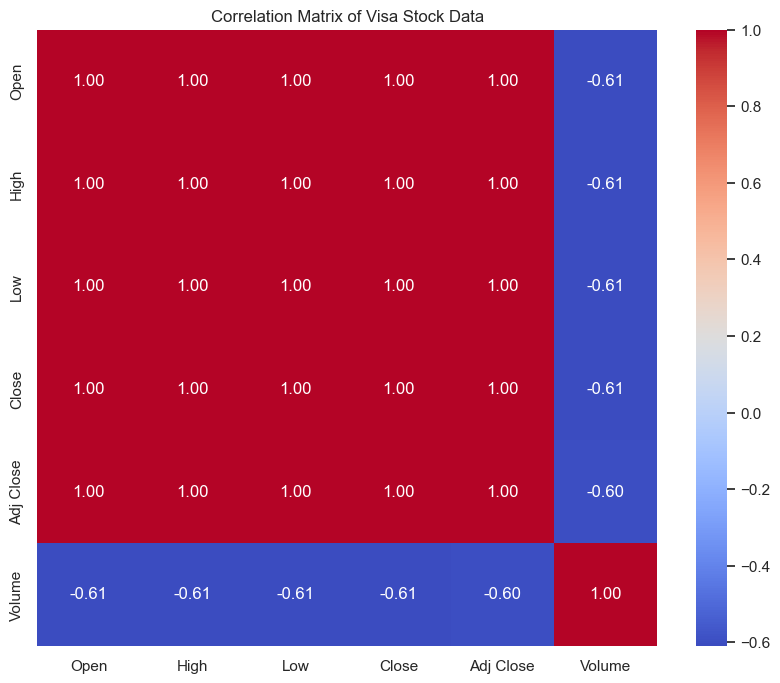

In [48]:
#3.6. Correlation Analysis (Optional)
#Purpose: To explore the relationship between different numerical variables, such as whether Volume correlates with Close prices or daily returns.

correlation_matrix = visa_data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Visa Stock Data")
plt.show()


### Correlation Analysis of Visa Stock Data

The correlation matrix above shows the relationships between different numerical variables in Visa’s stock data. Here’s an interpretation:

1. **Perfect Positive Correlation Among Price Variables**:
   - The `Open`, `High`, `Low`, `Close`, and `Adj Close` columns all have a correlation of `1.00` with each other.
   - This indicates a perfect positive correlation, which means these prices move together exactly. For instance, when the `Open` price increases, the `High`, `Low`, `Close`, and `Adj Close` prices also increase proportionally.
   - This is expected in stock data, as these price metrics are derived from each other on the same trading day and are therefore inherently related.

2. **Negative Correlation Between Volume and Price Variables**:
   - The `Volume` column has a moderate negative correlation (around `-0.60` to `-0.61`) with all price columns (`Open`, `High`, `Low`, `Close`, `Adj Close`).
   - This suggests that, generally, higher trading volumes are associated with lower prices, and vice versa.
   - In simple terms, when trading volume spikes, it often corresponds to price drops, which could indicate times of selling pressure or market reactions to negative events.

3. **Interpretation of Volume and Price Relationship**:
   - This negative correlation between `Volume` and price indicators could indicate that investors tend to trade more during market declines (selling shares), which is a common pattern in stock markets.
   - This insight can be useful for identifying periods of high trading activity in response to price movements.

### Summary
In summary, the price columns (`Open`, `High`, `Low`, `Close`, and `Adj Close`) are perfectly correlated with each other, reflecting their interdependent nature. `Volume`, however, has a moderate negative correlation with price, suggesting that higher trading activity may be associated with price declines. This matrix provides insights into how Visa’s stock prices and trading volume relate to each other, which can help understand trading patterns and market sentiment.


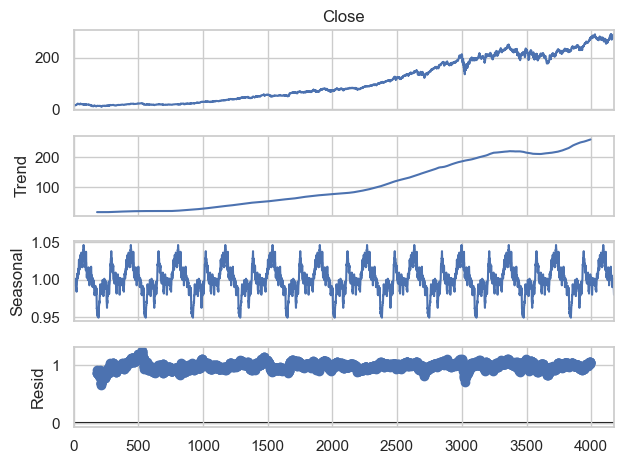

In [52]:
#3.7. Seasonal and Trend Decomposition (Optional)
#Purpose: To separate the data into trend, seasonality, and noise components, which helps in understanding underlying patterns.

from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose 'Close' price using seasonal_decompose
close_decomposition = seasonal_decompose(visa_data['Close'], model='multiplicative', period=365)

close_decomposition.plot()
plt.show()


**Trend:**  
* Steady, long-term upward growth in stock price.

**Seasonal:**
* Repeating annual patterns, likely tied to broader economic cycles or company-specific factors.

**Residual:**
* Small, random variations indicating that most of the stock’s price movement can be explained by trend and seasonality.

From **2008 to October 2024**, Visa Inc.'s stock displayed a clear, long-term **growth trajectory** with substantial price appreciation, reflecting the company's **strong market position** and **investor confidence**. Over this period, the stock experienced **periods of volatility**, primarily linked to broader economic events, which resulted in noticeable fluctuations in **daily returns** and **trading volume**. High trading volumes often aligned with these volatile periods, suggesting heightened market activity in response to **economic shifts** or **corporate developments**. However, our **correlation analysis** indicates that **trading volume has a minimal direct impact on price changes**, underscoring that **external factors** likely play a larger role in driving Visa’s stock price.

**Key insights for decision-making** include Visa's **resilience** and **sustained upward trend**, making it a reliable component for **long-term investment portfolios**. The observed volatility spikes provide actionable intelligence on **potential periods of risk**, particularly during economic downturns, which may inform **risk management** and **hedging strategies**. This analysis offers a robust foundation for understanding Visa’s stock dynamics, enabling **strategic investment decisions** focused on both **growth** and **risk mitigation**.
